In [1]:
import numpy as np
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X,y=make_classification(n_samples=100,n_features=2,n_classes=2,n_redundant=0,n_repeated=0,n_clusters_per_class=1,random_state=2121)
x=X

In [3]:
## Changing all 0 in y labels to -1
y=np.where(y==1,1,-1)

<Axes: >

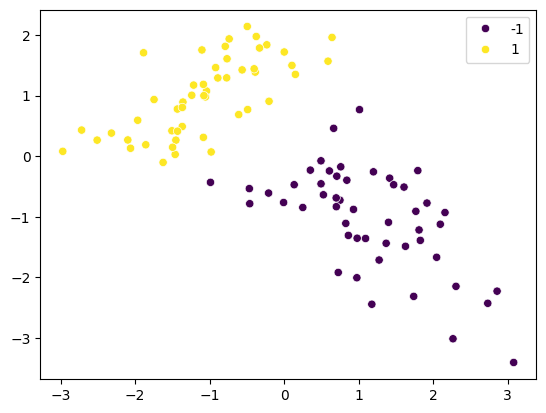

In [4]:
sns.scatterplot ( x=X[:,0],y=X[:,1],hue=y,palette="viridis")

In [5]:
X=np.insert(X,0,1,axis=1)

In [6]:
w_in=np.array([2,33,4])

### Percptron Loss Function

In [7]:
def percepton_loss(X,y,w_in):
    """ 
    w_in:Array; It consists biase as first elements and other elements are weights [b,w1,w2,......]
    y: Array; It has labels of output class with -1 and 1 as negative and positive class
    X:Array; It has input data except first column is full  of ones (1)
    """
    n=X.shape[0] ## no of data points
    f_X=np.dot(X,w_in.T)
    loss=np.maximum(0,-y*f_X)
    loss=np.sum(loss)
    return loss/n

In [8]:
percepton_loss(X,y,w_in)

np.float64(34.006250435406294)

In [9]:

def boundary_plot(X, y, w):
    df = pd.DataFrame({
        'x': X[:,1],
        'y': X[:,2]
    })

    sns.scatterplot(data=df, x='x', y='y', hue=y, palette="viridis", s=80)

    x_vals = np.linspace(np.min(X[:,1])-1, np.max(X[:,1])+1, 100)
    y_vals = -(w[1] * x_vals + w[0]) / w[2]
    df_line = pd.DataFrame({'x': x_vals, 'y': y_vals})
    sns.lineplot(data=df_line, x='x', y='y', color='red')
    plt.xlim(-4, 5)   # zoom horizontally
    plt.ylim(-4,3)   # zoom vertically
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f"Total Perceptron loss is {percepton_loss(w,y,X)}")
    plt.legend()
    plt.show()


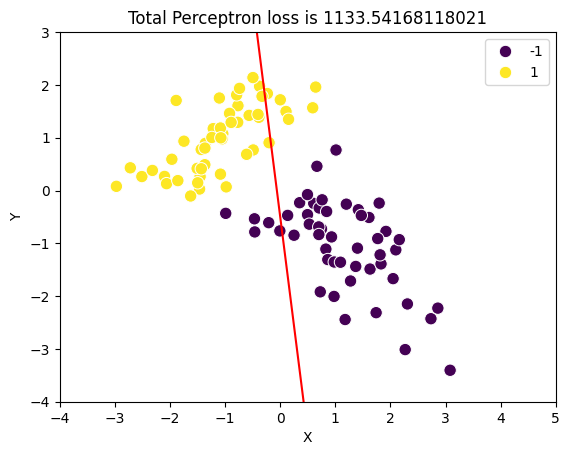

In [10]:
boundary_plot(X,y,w_in)

In [11]:
def gradient( X, y,w_in):
    grad_w = np.zeros_like(w_in)
    n_rows, n_cols = X.shape

    for j in range(n_cols):
        for i in range(n_rows):
            f_x = np.dot(X[i, :], w_in)
            if y[i] * f_x <= 0:  
                grad_w[j] -= y[i] * X[i, j]   
    return grad_w / n_rows


In [12]:
gradient(X,y,w_in)

array([ 0.01,  0.68, -0.47])

In [13]:
def gradient_descent(X,y,w_in,epoch,lr):
    weights_history=[]
    w_finall=w_in
    for i in range(epoch):
        w_finall=w_finall-lr*gradient(X,y,w_finall)
        weights_history.append(w_finall.copy())

    return w_finall,weights_history    

In [14]:
w_final,wt=gradient_descent(X,y,w_in,1000,0.1)

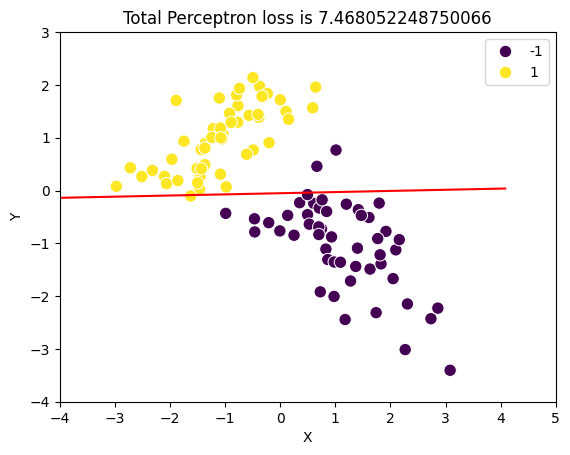

In [15]:
boundary_plot(X,y,w_final)